# Metodo del codo y metodo de la silueta

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn import metrics
from scipy.spatial.distance import cdist
from sklearn.metrics import silhouette_samples, silhouette_score

%matplotlib inline

#x1 son las coordenadas de las x y x2 son las coordenadas de las y 
x1 = np.array([3,1,1,2,1,6,6,6,5,6,7,8,9,8,9,9,8])
x2 = np.array([5,4,5,6,5,8,6,7,6,7,1,2,1,2,3,2,3])

X = np.array(list(zip(x1, x2))).reshape(len(x1), 2)
X

array([[3, 5],
       [1, 4],
       [1, 5],
       [2, 6],
       [1, 5],
       [6, 8],
       [6, 6],
       [6, 7],
       [5, 6],
       [6, 7],
       [7, 1],
       [8, 2],
       [9, 1],
       [8, 2],
       [9, 3],
       [9, 2],
       [8, 3]])

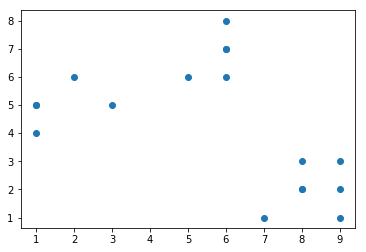

In [2]:
plt.scatter(x1, x2)

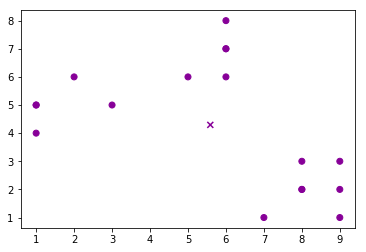

Con k =  2  el coeficiente de silueta es:  0.611342436871


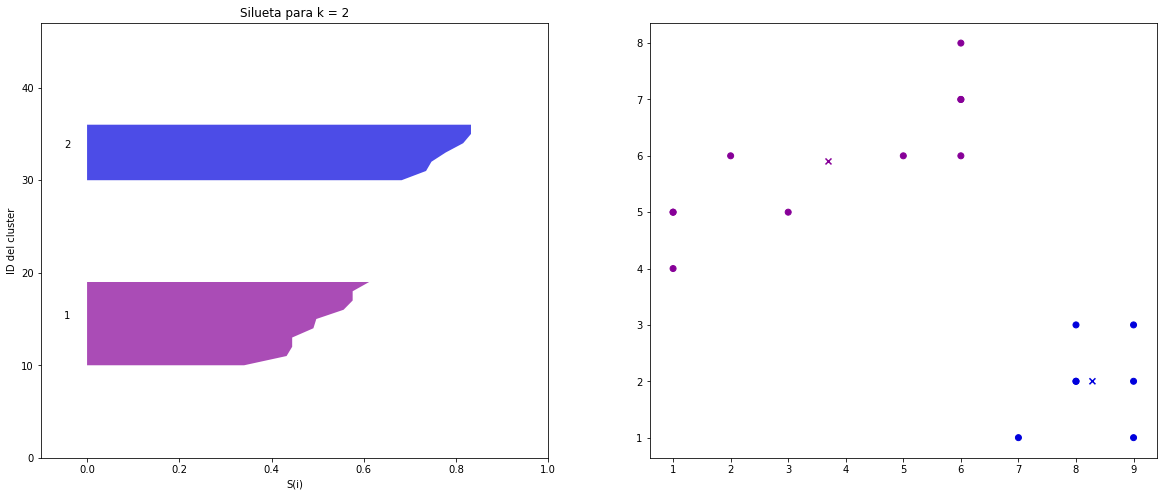

Con k =  3  el coeficiente de silueta es:  0.712207938329


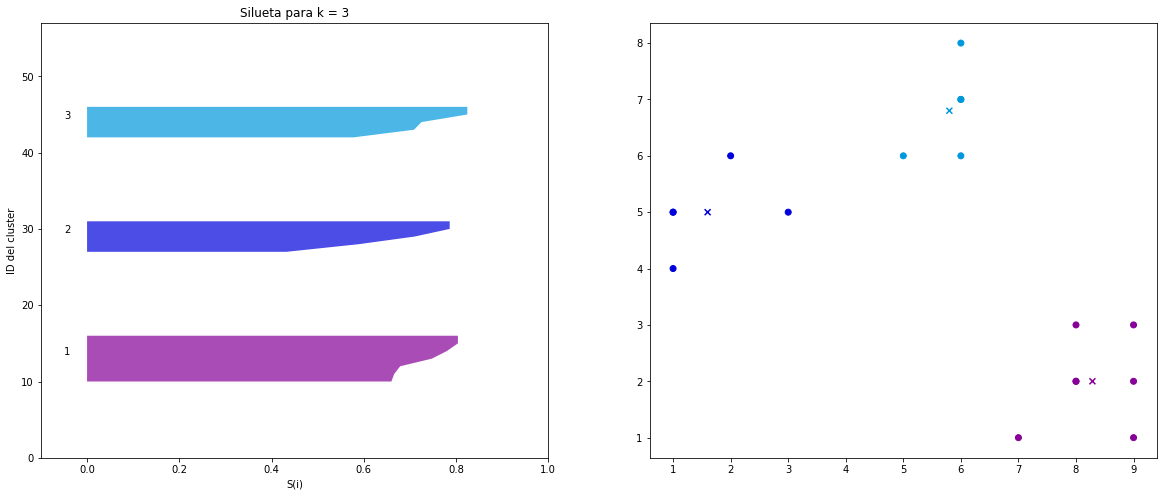

Con k =  4  el coeficiente de silueta es:  0.638994864313


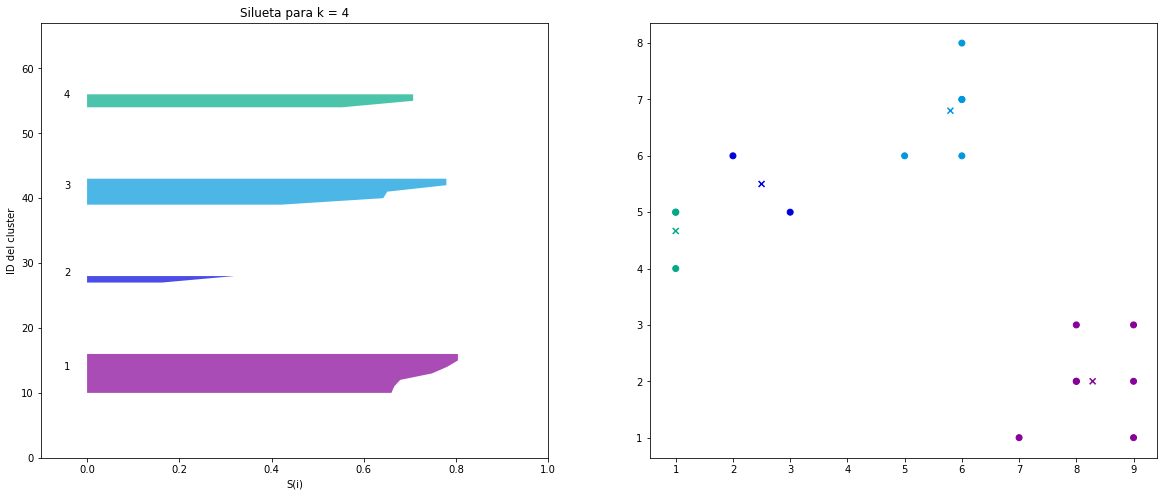

Con k =  5  el coeficiente de silueta es:  0.450456025779


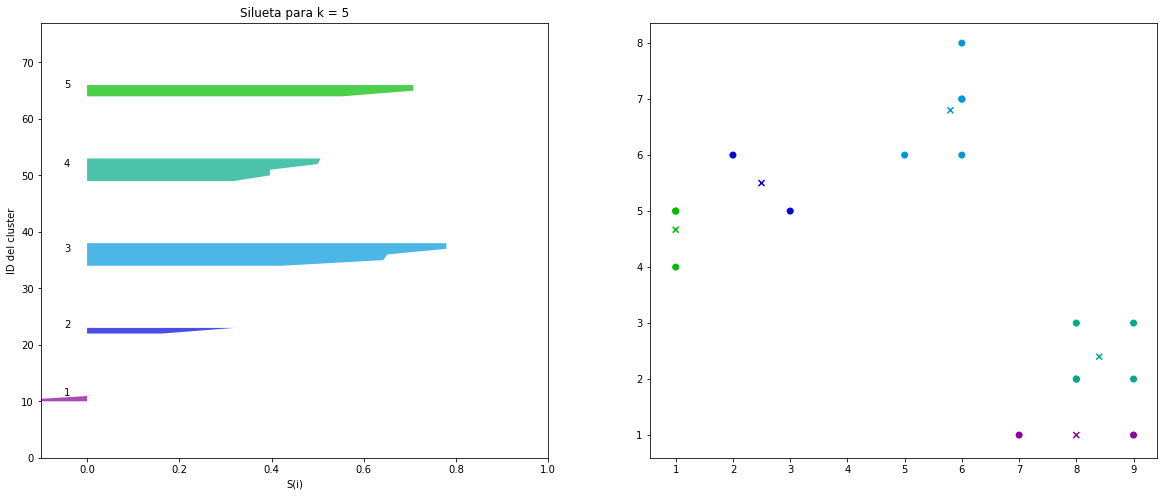

Con k =  6  el coeficiente de silueta es:  0.41599749624


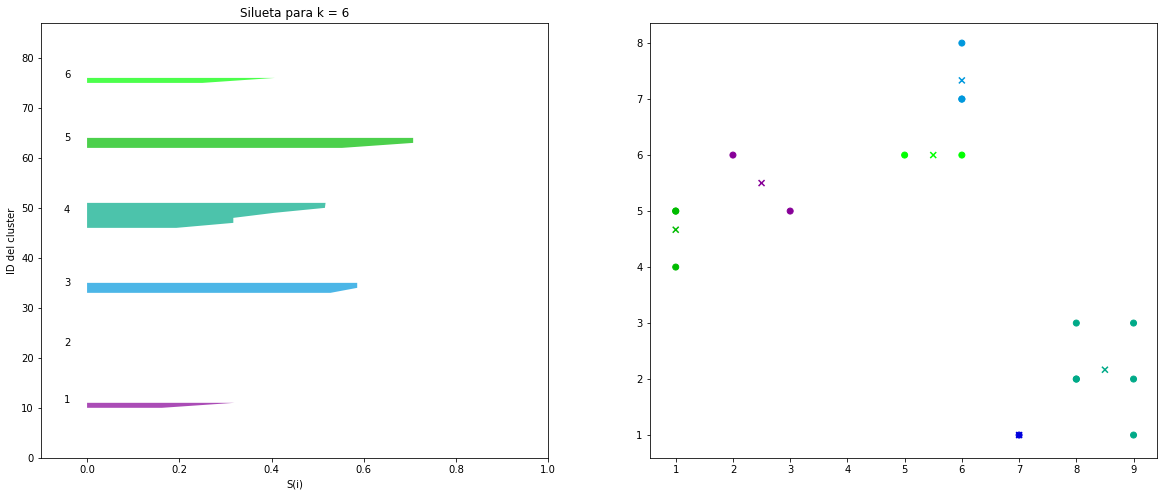

Con k =  7  el coeficiente de silueta es:  0.33951705707


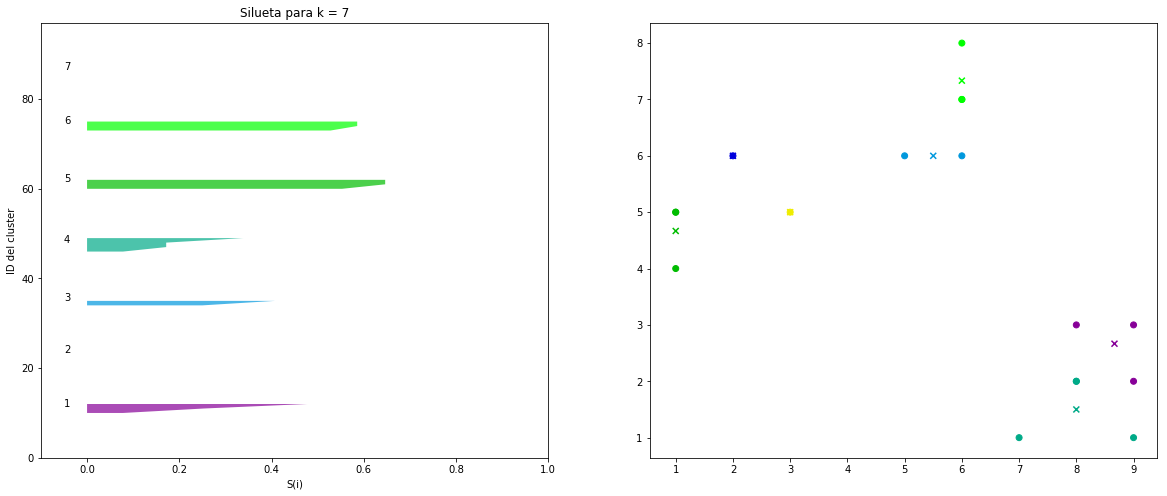

Con k =  8  el coeficiente de silueta es:  0.434811927521


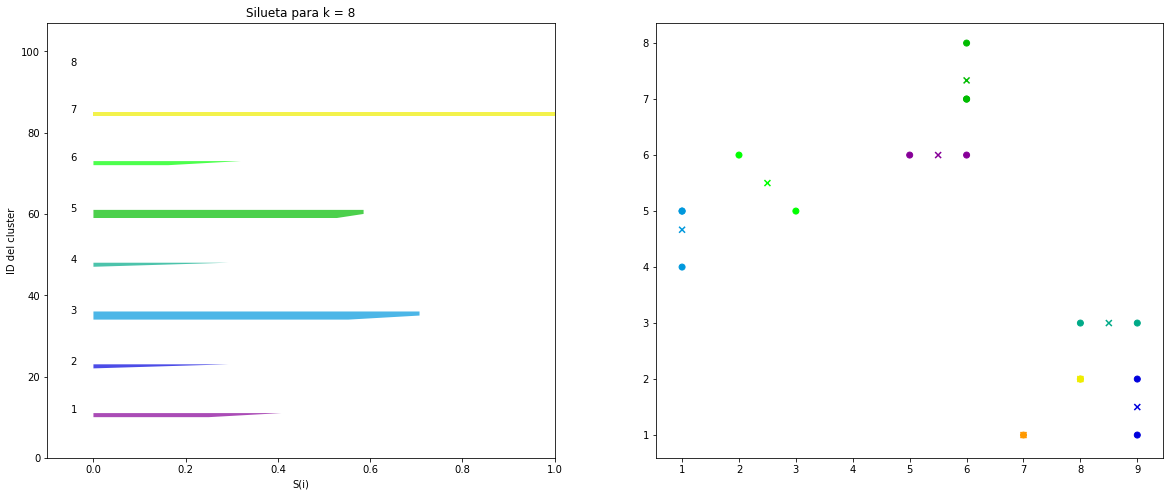

Con k =  9  el coeficiente de silueta es:  0.399326107879


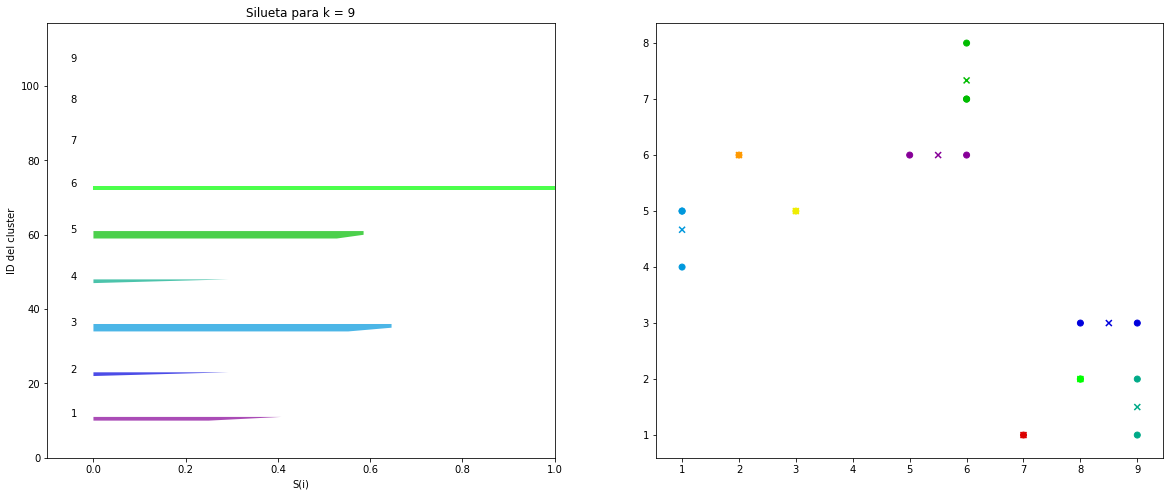

Con k =  10  el coeficiente de silueta es:  0.408403777096


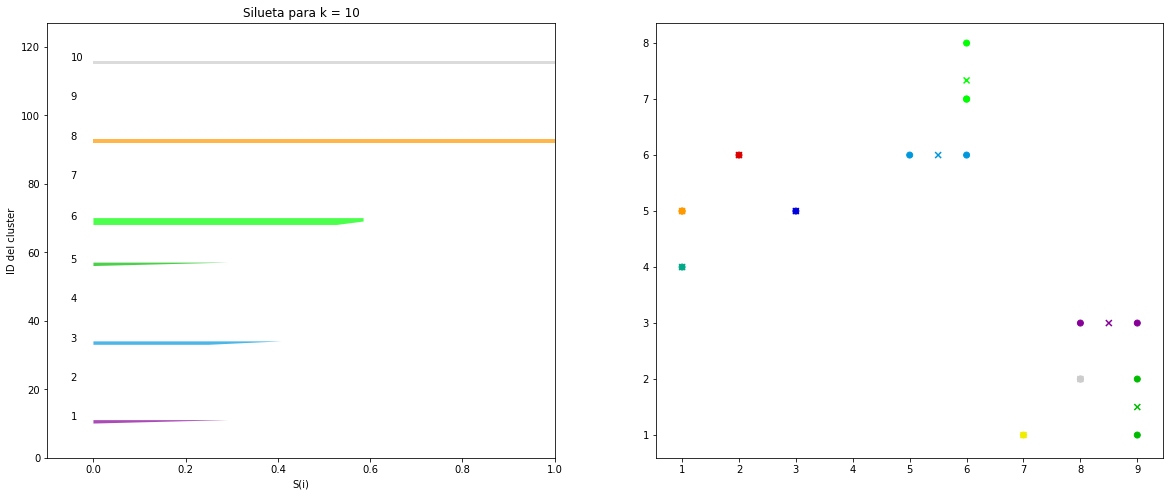

In [55]:
#maximo numero de clusters
max_k = 10
K = range(1, max_k + 1)

#Creamos una paleta de colores para el gráfico
color_palette = [plt.cm.spectral(float(i)/max_k) for i in K]
centroid = [sum(X) / len(X) for i in K]

ssw = []
sst = sum(np.min(cdist(X, centroid, "euclidean"), axis = 1))

for k in K:
    #Creamos el modelo para k clusters
    model = KMeans(n_clusters=k).fit(X)
    
    centers = pd.DataFrame(model.cluster_centers_)
    
    #Calculamos la ssw para k clusters y la añadimos a la lista de ssw
    ssw_k = sum(np.min(cdist(X, model.cluster_centers_, "euclidean"), axis = 1))
    ssw.append(ssw_k)
    
    label_color = [color_palette[i] for i in model.labels_]
    
    #No podemos crear la silueta si k es 1 o si hay tantos clusters como elementos
    if 1 < k < len(X):
        #Para cada iteración creamos un subplot de 2 columnas (una para la silueta y otra para los clusters)
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(20, 8)
        
        #Como ya sabemos que los valores están entre -1 y 1 podemos ajustar el gráfico
        ax1.set_xlim([-0.1, 1])
        #Para que quede espaciado en función del número de clusters:
        ax1.set_ylim([0, len(X) + (k + 1) * 10])
        
        #Calculamos el promedio de los coeficiente de silueta
        sil_avg = silhouette_score(X, model.labels_)
        print("Con k = ", k, " el coeficiente de silueta es: ", sil_avg)
        
        #Ahora pintamos los coeficientes
        sample_sil_values = silhouette_samples(X, model.labels_)
        
        y_lower = 10
        for i in range(k):
            #Obtenemos el coeficiente de silueta para cada elemento del cluster i
            i_cluster_sil_value = sample_sil_values[model.labels_ == i]
            #Las ordenamos descendientemente para pintarlas
            i_cluster_sil_value.sort()
            
            #Calculamos donde colocar la primera silueta en el eje vertical
            i_cluster_size = i_cluster_sil_value.shape[0]
            y_upper = y_lower + i_cluster_size
            
            color = color_palette[i]
            #Pintamos la silueta del cluster i-esimo
            ax1.fill_betweenx(np.arange(y_lower, y_upper), 0, i_cluster_sil_value, facecolor=color, alpha = 0.7)
            
            #Etiquetamos la silueta con el número del cluster
            ax1.text(-0.05, y_lower + 0.5 * i_cluster_size, str(i + 1))
            
            #Recalculamos y_lower
            y_lower = y_upper + 10
            
        ax1.set_title("Silueta para k = %s"%str(k))
        ax1.set_xlabel("S(i)")
        ax1.set_ylabel("ID del cluster")
    plt.scatter(x1, x2, c=label_color)
    plt.scatter(centers[0], centers[1], c=color_palette, marker="x")
    plt.show()

Como podemos ver con el método de la silueta el número óptimo de clusters es 3.<br>
Complementaremos esta información con el método del codo.

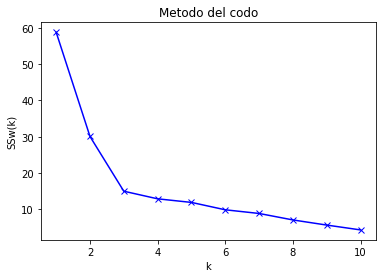

In [64]:
plt.plot(K, ssw, "bx-")
plt.xlabel("k")
plt.ylabel("SSw(k)")
plt.title("Metodo del codo")
plt.show()

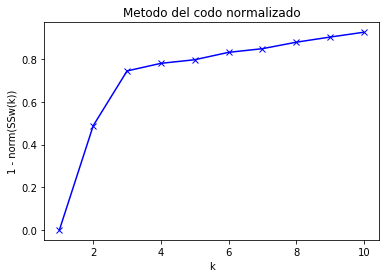

In [68]:
plt.plot(K, 1 - ssw/sst, "bx-")
plt.xlabel("k")
plt.ylabel("1 - norm(SSw(k))")
plt.title("Metodo del codo normalizado")
plt.show()

Con todos los caminos llegamos a la conclusión de que el número de clusters apropiado es k=3